<a href="https://colab.research.google.com/github/VibroGuard/Visualize-Data/blob/main/Visualize-Basics/Visualize_Vibration_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualize Vibration Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pre_process_data(data):
    """
    [x,y,z], [x,y,z], [x,y,z] to [x,x,x] [y,y,y] [z,z,z] format
    This function processes the data and returns the x, y, z values of the data
    :param data:
    :return: for given data set it returns x, y, z values separately
    """
    x_ = data[:, 0]
    y_ = data[:, 1]
    z_ = data[:, 2]
    return x_, y_, z_

In [3]:
def fft_data(data):
    """
    This function takes the data and returns the fft of the data
    :param data:
    :return: fft of the data (x+iy) and absolute value of the fft (magnitude of the fft)
    """
    fft_result = np.fft.fft(data)
    return fft_result.tolist(), np.abs(fft_result).tolist()

In [4]:
def visualize_data(x, y, z, sps, plot_type):
    """
    This function visualizes the data in x, y, z directions with respect to time
    :param x:
    :param y:
    :param z:
    :param sps samples per second:
    :return: plots the data
    """
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    names = ["x - axis", "y - axis", "z - axis"]
    for i, ax in enumerate(axs):
        data = [x, y, z][i]
        if plot_type == "time":
          time = len(data) / sps  # time = number of samples / samples per second
          horizontal_axis = np.linspace(0, time, len(data))
        elif plot_type == "frequency":
          horizontal_axis = np.linspace(0, sps, len(data))
        ax.stem(horizontal_axis, data)

        ax.set_title(names[i])
        if plot_type == "time": xLabel = "Time (s)"
        elif plot_type == "frequency": xLabel = "Freqeuncy (Hz)"
        ax.set_xlabel(xLabel)
        ax.set_ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

In [5]:
# Sample data sets
data_sets = [[1, 2, 3], [4, 5, 6], [7, 10, 3], [1, 5, 9]]  # put data set here
data_sets = np.array(data_sets)

In [6]:
sampling_frequency = 40
num_samples = 64
data_set_2 = [[int(100 * np.sin(5 * 2 * np.pi * i / num_samples)) for i in range(num_samples)], [np.random.randint(-5, 5) for _ in range(num_samples)], [i for i in range(num_samples)]]

[0, 47, 83, 99, 92, 63, 19, -29, -70, -95, -98, -77, -38, 9, 55, 88, 100, 88, 55, 9, -38, -77, -98, -95, -70, -29, 19, 63, 92, 99, 83, 47, 0, -47, -83, -99, -92, -63, -19, 29, 70, 95, 98, 77, 38, -9, -55, -88, -100, -88, -55, -9, 38, 77, 98, 95, 70, 29, -19, -63, -92, -99, -83, -47]
[3, -3, -4, -5, 4, -3, 4, -1, 1, -5, -1, -3, 4, 0, 0, -4, 1, 0, -4, 1, -5, 1, -1, 4, -3, -1, 4, -2, 1, 4, -4, 2, -5, 2, 0, -3, 4, 2, -5, 0, 2, -1, -2, -1, 3, -5, 4, 4, -1, 4, 3, -5, 0, 3, -1, 0, -2, -4, -3, 3, -1, -5, -1, 2]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]

[0.0, 2.800620808906075, 0.0, 0.3026348201490521, 0.0, 3185.6588231286114, 0.0, 1.7107261351529917, 0.0, 8.352759127780148, 0.0, 1.7983868646458632, 0.0, 1.0929819747931533, 0.0, 5.4492283357881774, 0.0, 5.706605967105304, 0.0, 2.2437284050783

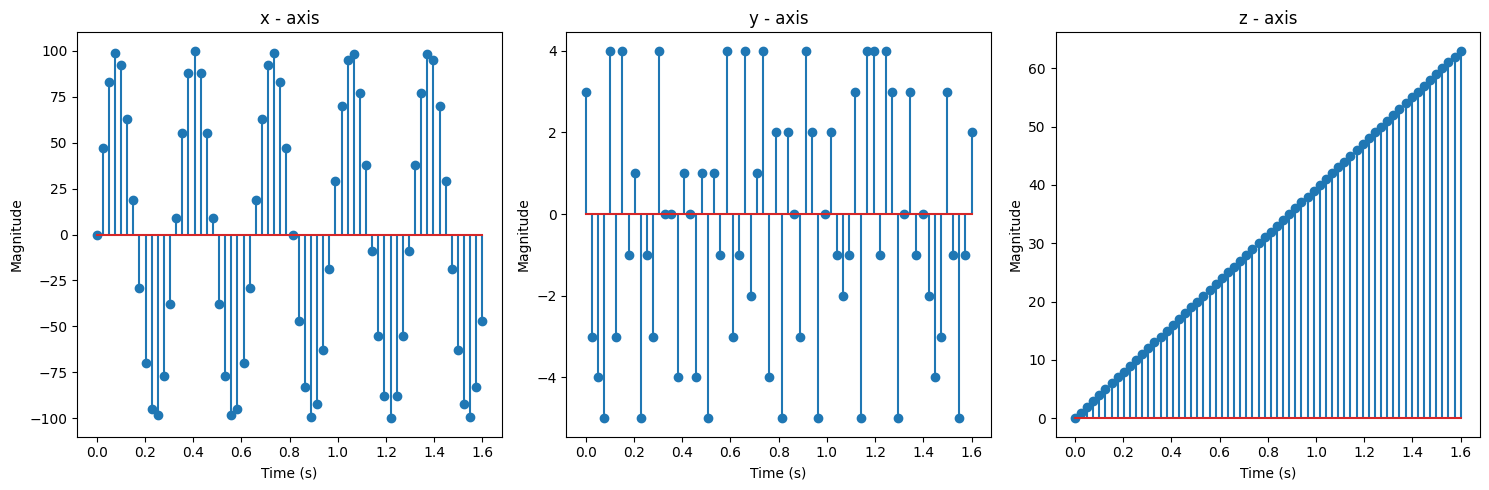

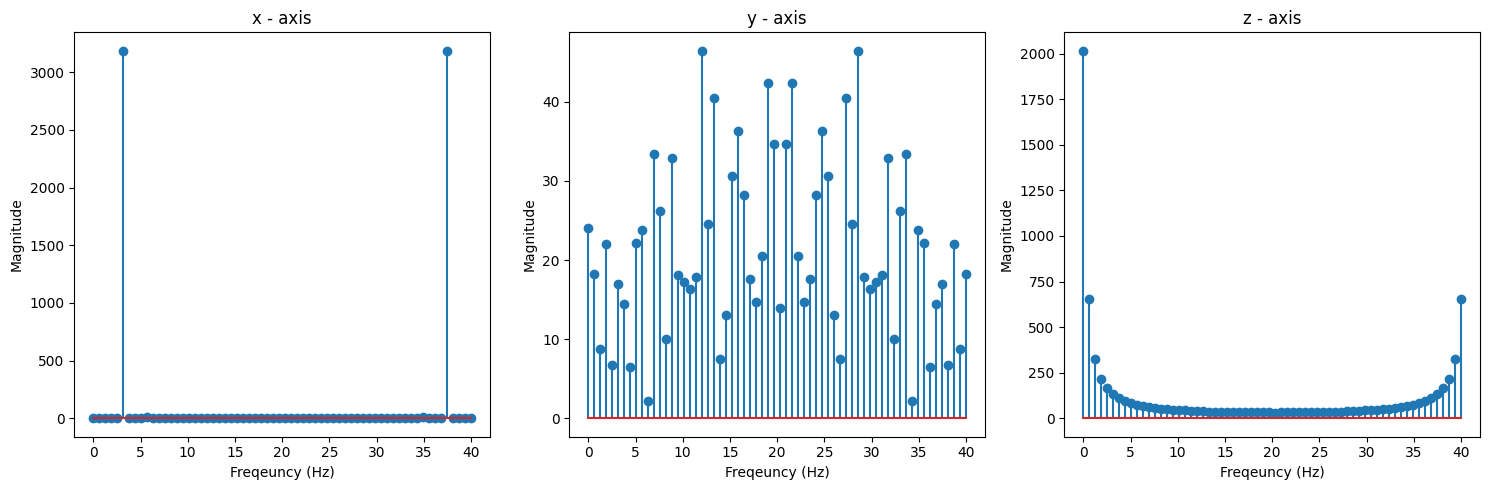

In [7]:
# x, y, z = pre_process_data(data_set_2)
x, y, z = data_set_2
print(x, y, z, sep="\n")
print()

fft_ij_x, fft_mag_x = fft_data(x)
fft_ij_y, fft_mag_y = fft_data(y)
fft_ij_z, fft_mag_z = fft_data(z)
print(fft_mag_x)
print(fft_mag_y)
print(fft_mag_z)

visualize_data(x, y, z, sampling_frequency, "time")

visualize_data(fft_mag_x, fft_mag_y, fft_mag_z, sampling_frequency, "frequency")